In [3]:
# 1. Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 2. Data Preprocessing


In [4]:
# 2.1. Importing Data
start = time.time()
datas = pd.read_csv('iphone_purchase_records.csv')

In [9]:
datas

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [5]:
# 2.2. Looking For Anomalies
print(datas.info()) # Looking for the missing values
print(datas.describe().T)
print(datas.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None
                 count        mean           std      min       25%      50%  \
Age              400.0     37.6550     10.482877     18.0     29.75     37.0   
Salary           400.0  69742.5000  34096.960282  15000.0  43000.00  70000.0   
Purchase Iphone  400.0      0.3575      0.479864      0.0      0.00      0.0   

                     75%       max  
Age                 46.0      60.0  
Salary           88000.0  150000.0  
Purchase Iphone      1.0       1.0  
Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64


In [ ]:
# 2.3. Creating correlation matrix heat map and examine relationship between datas

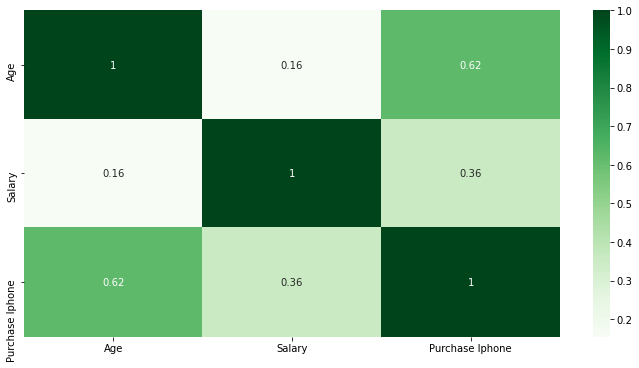

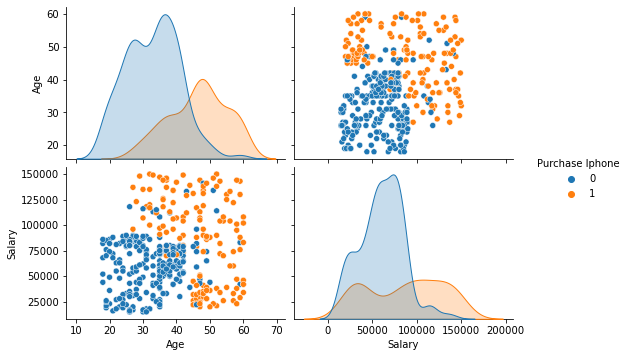

In [6]:
plt.figure(figsize = (12, 6))
sns.heatmap(datas.corr(),annot = True, cmap="Greens")
sns.pairplot(datas, hue = 'Purchase Iphone', aspect = 1.5)
plt.show()

In [7]:
# 3.4. Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
datas["Gender"] = le.fit_transform(datas['Gender'])

In [8]:
# 2.5. DataFrame Slice - Determination of Dependent and Independent Variables
y = datas.iloc[:, 3:4]
x = datas.iloc[:, 0:3]  

In [10]:
# 2.6. NumPy Array Translate
X = x.values
Y = y.values

In [11]:
# 2.7. Train - Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0) 

In [12]:
# 2.8. Scaling Datas
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [13]:
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [ ]:
# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [15]:
y_pred = logr.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
# Confusion Matrix - Accuracy Score
cm = confusion_matrix(y_test, y_pred)
print('\nLogistic Regression Confusion Matrix')
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")


Logistic Regression Confusion Matrix
[[78  6]
 [10 38]]
Accuracy score: 0.8787878787878788


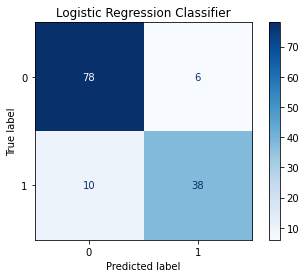

In [18]:
# Plotting Confusion Matrix
plot_confusion_matrix(logr, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Logistic Regression Classifier')  
plt.show()

In [19]:
# Predicting
predict = np.array([1, 19, 19000]).reshape(1, 3)
y_pred = logr.predict(predict)
if y_pred == 0:
    print("The model predicted as he/she didn't get Iphone. Class: ", y_pred)
else:
    print('The model predicted as he/she get Iphone. Class: ', y_pred)

The model predicted as he/she get Iphone. Class:  [1]


In [ ]:
# K-NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [22]:
# Confusion Matrix - Accuracy Score - K-NN Score
print('\nK-NN Confusion Matrix')
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"K-NN Score: {knn.score(X_test, y_test)}")


K-NN Confusion Matrix
[[78  6]
 [ 6 42]]
Accuracy score: 0.9090909090909091
K-NN Score: 0.9090909090909091


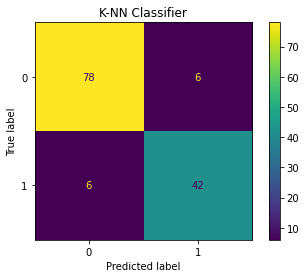

In [23]:
# Plotting Confusion Matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.title('K-NN Classifier')  
plt.show()

In [24]:
# Predicting
predict = np.array([1, 19, 19000]).reshape(1, 3)
y_pred = knn.predict(predict)
if y_pred == 0:
    print("The model predicted as he/she didn't get Iphone. Class: ", y_pred)
else:
    print('The model predicted as he/she get Iphone. Class: ', y_pred)

The model predicted as he/she get Iphone. Class:  [1]


In [ ]:
# SVM

In [25]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', C=4, gamma=0.1) # linear-rbf-sigmoid-precomputed-callable
svc.fit(X_train,y_train)


SVC(C=4, gamma=0.1, kernel='sigmoid')

In [26]:
y_pred = svc.predict(X_test)

In [27]:
# Confusion Matrix - Accuracy Score
cm = confusion_matrix(y_test, y_pred)
print('\nSVC Confusion Matrix')
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")



SVC Confusion Matrix
[[78  6]
 [13 35]]
Accuracy score: 0.8560606060606061


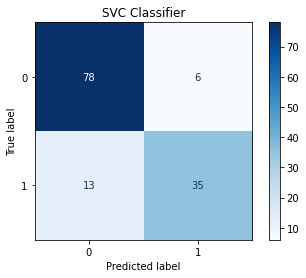

In [28]:
# Plotting Confusion Matrix
plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues)
plt.title('SVC Classifier')  
plt.show()

In [29]:
# Predicting
predict = np.array([1, 19, 19000]).reshape(1, 3)
y_pred = svc.predict(predict)
if y_pred == 0:
    print("The model predicted as he/she didn't get Iphone. Class: ", y_pred)
else:
    print('The model predicted as he/she get Iphone. Class: ', y_pred)
    

The model predicted as he/she didn't get Iphone. Class:  [0]


In [ ]:
# Desicion Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
y_pred = dtc.predict(X_test) 


Decision Tree Classifier Confusion Matrix
[[76  8]
 [ 7 41]]
Accuracy score: 0.8863636363636364


[Text(161.86102941176472, 208.38, 'X[1] <= 0.569\nentropy = 0.938\nsamples = 268\nvalue = [173, 95]'),
 Text(83.7, 190.26, 'X[2] <= 0.619\nentropy = 0.658\nsamples = 194\nvalue = [161, 33]'),
 Text(39.38823529411765, 172.14, 'X[1] <= -0.121\nentropy = 0.229\nsamples = 162\nvalue = [156, 6]'),
 Text(29.541176470588237, 154.01999999999998, 'entropy = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(49.23529411764706, 154.01999999999998, 'X[2] <= 0.414\nentropy = 0.491\nsamples = 56\nvalue = [50, 6]'),
 Text(39.38823529411765, 135.89999999999998, 'X[2] <= -0.056\nentropy = 0.381\nsamples = 54\nvalue = [50, 4]'),
 Text(29.541176470588237, 117.77999999999999, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(49.23529411764706, 117.77999999999999, 'X[2] <= 0.032\nentropy = 0.592\nsamples = 28\nvalue = [24, 4]'),
 Text(39.38823529411765, 99.66, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(59.082352941176474, 99.66, 'X[1] <= 0.273\nentropy = 0.503\nsamples = 27\nvalue = [24, 3]'),
 T

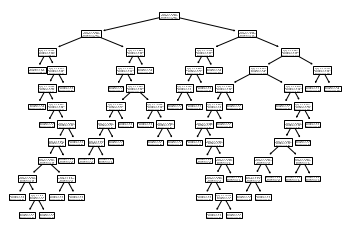

In [32]:
# Confusion Matrix - Accuracy Score
cm = confusion_matrix(y_test, y_pred)
print('\nDecision Tree Classifier Confusion Matrix')
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
tree.plot_tree(dtc) 

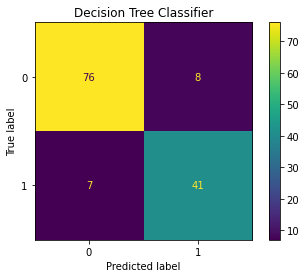

In [33]:
# Plotting Confusion Matrix
plot_confusion_matrix(dtc, X_test, y_test)
plt.title('Decision Tree Classifier')
plt.show()

In [34]:
# Predicting
predict = np.array([1, 19, 19000]).reshape(1, 3)
y_pred = dtc.predict(predict)
if y_pred == 0:
    print("The model predicted as he/she didn't get Iphone. Class: ", y_pred)
else:
    print('The model predicted as he/she get Iphone. Class: ', y_pred)


The model predicted as he/she get Iphone. Class:  [1]


In [ ]:
# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train) 


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [36]:
y_pred = rfc.predict(X_test)


In [37]:
# Confusion Matrix - Accuracy Score
cm = confusion_matrix(y_test, y_pred)
print('\nRandom Forest Confusion Matrix')
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")



Random Forest Confusion Matrix
[[77  7]
 [ 7 41]]
Accuracy score: 0.8939393939393939


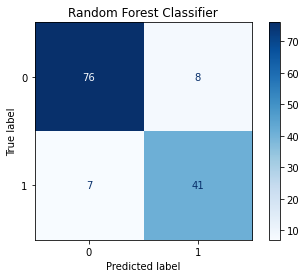

In [38]:
# Plotting Confusion Matrix
plot_confusion_matrix(dtc, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Random Forest Classifier')
plt.show()

In [39]:
# Predicting
predict = np.array([1, 19, 19000]).reshape(1, 3)
y_pred = rfc.predict(predict)
if y_pred == 0:
    print("The model predicted as he/she didn't get Iphone. Class: ", y_pred)
else:
    print('The model predicted as he/she get Iphone. Class: ', y_pred)


The model predicted as he/she get Iphone. Class:  [1]


In [42]:
# K-Fold Cross Validation

from sklearn.model_selection import cross_val_score

success = cross_val_score(estimator = svc, X=X_train, y=y_train, cv = 4)
print("\nK-Fold Cross Validation:")
print("Success Mean:\n", success.mean())
print("Success Standard Deviation:\n", success.std())



K-Fold Cross Validation:
Success Mean:
 0.8059701492537312
Success Standard Deviation:
 0.061538889934591945


In [ ]:
# Grid Search

In [43]:
from sklearn.model_selection import GridSearchCV
p = [{'C':[1,2,3,4,5],'kernel':['linear'], 'gamma':[1,0.5,0.1,0.01,0.001]},
     {'C':[1,2,3,4,5] ,'kernel':['rbf'], 'gamma':[1,0.5,0.1,0.01,0.001]},
     {'C':[1,2,3,4,5] ,'kernel':['sigmoid'], 'gamma':[1,0.5,0.1,0.01,0.001]},
     {'C':[1,2,3,4,5] ,'kernel':['callable'], 'gamma':[1,0.5,0.1,0.01,0.001]}]


In [44]:
gs = GridSearchCV(estimator=svc,
                  param_grid=p,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

In [45]:
grid_search = gs.fit(X_train, y_train)
best_result = grid_search.best_score_
best_parameters = grid_search.best_params_
print("\nGrid Search")
print("Best result:\n", best_result)
print("Best parameters:\n", best_parameters)


Grid Search
Best result:
 0.9107617051013278
Best parameters:
 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# Saving Model

In [46]:
# Pickle
import pickle
file = "logr.save"
pickle.dump(logr, open(file, 'wb'))

In [47]:
downloaded_data = pickle.load(open(file, 'rb'))
print(downloaded_data.predict(X_test))

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1]


In [48]:
end = time.time()
cal_time = end - start
print("\nProcess took {} seconds.".format(cal_time))


Process took 938.4989950656891 seconds.
